# Project 2: Part 3
ST 590  
Summer 2022  
By Claudia Donahue and Collin Knezevich  

For part 3, you’ll want to take the code you created for homework 4 and do similar things via spark. (This part should be very easy/short if you have spark up and running! You can use the spark SQL or pandas-on-spark functionality rather than writing your own MapReduce type code.) That is, you want to:  

• read in the full nfl data set into spark a spark data frame or pandas-on-Spark data frame  
 

In [1]:
import pandas as pd
import numpy as np
import pyspark.pandas as ps
from pyspark.sql import SparkSession
import pyspark.sql.functions as func

spark = SparkSession.builder.master('local[*]').appName('my_app').getOrCreate()

data = spark.read.load("scoresFull.csv",
                     format="csv", 
                     sep=",", 
                     inferSchema="true", 
                     header="true")

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


22/06/26 16:23:06 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


• use spark SQL or pandas-on-Spark to find the mean and standard deviation for the AQ1, AQ2, AQ3, AQ4, AQFinal, HQ1, HQ2, HQ3, HQ4, and HFinal variables  

In [2]:
# select the desired columns and save them as a pyspark df
df2 = data.select('AQ1','AQ2','AQ3','AQ4','AFinal','HQ1','HQ2','HQ3','HQ4','HFinal')

In [3]:
# Find the mean of each column
df3 = df2.select(*[func.mean(c).alias(c) for c in df2.columns])

df3 = df3.select(*[func.round(c).alias(c) for c in df3.columns])

df3.show()

+---+---+---+---+------+---+---+---+---+------+
|AQ1|AQ2|AQ3|AQ4|AFinal|HQ1|HQ2|HQ3|HQ4|HFinal|
+---+---+---+---+------+---+---+---+---+------+
|4.0|6.0|4.0|6.0|  21.0|5.0|7.0|5.0|6.0|  23.0|
+---+---+---+---+------+---+---+---+---+------+



In [4]:
# Find the std of each column
df4 = df2.select(*[func.stddev(c).alias(c) for c in df2.columns])

df4 = df4.select(*[func.round(c).alias(c) for c in df4.columns])

df4.show()

22/06/26 16:23:31 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.
+---+---+---+---+------+---+---+---+---+------+
|AQ1|AQ2|AQ3|AQ4|AFinal|HQ1|HQ2|HQ3|HQ4|HFinal|
+---+---+---+---+------+---+---+---+---+------+
|4.0|5.0|5.0|5.0|  10.0|5.0|6.0|5.0|5.0|  10.0|
+---+---+---+---+------+---+---+---+---+------+



• repeat the above process but do so for each value of the season variable  

In [5]:
# select the desired columns and save them as a pyspark df
df1 = data.select('season','AQ1','AQ2','AQ3','AQ4','AFinal','HQ1','HQ2','HQ3','HQ4','HFinal')

# group by season and calculate mean for each column/row
df1 = df1.groupBy("season").mean()

# drop the column for average of the 'season' 
df1 = df1.drop('avg(season)')

# round all columns
df6 = df1.select(*[func.round(c).alias(c) for c in df1.columns])

# Sort by the season/year
df6.sort('season').show()

+------+--------+--------+--------+--------+-----------+--------+--------+--------+--------+-----------+
|season|avg(AQ1)|avg(AQ2)|avg(AQ3)|avg(AQ4)|avg(AFinal)|avg(HQ1)|avg(HQ2)|avg(HQ3)|avg(HQ4)|avg(HFinal)|
+------+--------+--------+--------+--------+-----------+--------+--------+--------+--------+-----------+
|  2002|     4.0|     6.0|     4.0|     6.0|       21.0|     4.0|     7.0|     5.0|     6.0|       23.0|
|  2003|     4.0|     6.0|     4.0|     5.0|       19.0|     5.0|     7.0|     5.0|     6.0|       23.0|
|  2004|     4.0|     6.0|     4.0|     6.0|       20.0|     5.0|     7.0|     4.0|     7.0|       23.0|
|  2005|     4.0|     6.0|     4.0|     5.0|       19.0|     4.0|     7.0|     5.0|     6.0|       22.0|
|  2006|     4.0|     6.0|     4.0|     6.0|       20.0|     5.0|     6.0|     5.0|     6.0|       21.0|
|  2007|     4.0|     6.0|     4.0|     6.0|       20.0|     5.0|     7.0|     5.0|     6.0|       23.0|
|  2008|     4.0|     6.0|     4.0|     6.0|       21.0

In [58]:
# Same for stdev

from pyspark.sql import DataFrame

# select the desired columns and save them as a pyspark df
df1 = data.select('season','AQ1','AQ2','AQ3','AQ4','AFinal','HQ1','HQ2','HQ3','HQ4','HFinal')

# group by season and calculate stdev for each column
df7 = df1.groupby("season")

# calculating standard deviations and merging data frames together 
# (.agg function only takes in one argument at a time)
aq1 = df7.agg({'AQ1':'std'})
aq2 = df7.agg({'AQ2':'std'})
aq3 = df7.agg({'AQ3':'std'}) 
aq4 = df7.agg({'AQ4':'std'}) 
afinal = df7.agg({'AFinal':'std'}) 
hq1 = df7.agg({'HQ1':'std'}) 
hq2 = df7.agg({'HQ2':'std'}) 
hq3 = df7.agg({'HQ3':'std'}) 
hq4 = df7.agg({'HQ4':'std'}) 
hfinal = df7.agg({'HFinal':'std'}) 

# merging data frames together
aq2 = aq1.join(aq2, aq1.season == aq2.season, "inner").drop(aq1.season)
aq3 = aq2.join(aq3, aq2.season == aq3.season, "inner").drop(aq2.season) 
aq4 = aq3.join(aq4, aq3.season == aq4.season, "inner").drop(aq3.season) 
afinal = aq4.join(afinal, aq4.season == afinal.season, "inner").drop(aq4.season)
hq1 = afinal.join(hq1, afinal.season == hq1.season, "inner").drop(afinal.season) 
hq2 = hq1.join(hq2, hq1.season == hq2.season, "inner").drop(hq1.season) 
hq3 = hq2.join(hq3, hq2.season == hq3.season, "inner").drop(hq2.season) 
hq4 = hq3.join(hq4, hq3.season == hq4.season, "inner").drop(hq3.season) 
hfinal = hq4.join(hfinal, hq4.season == hfinal.season, "inner").drop(hq4.season) 

# rounding 
df8 = hfinal.select(*[func.round(c).alias(c) for c in hfinal.columns]) 

# sort by season 
df8.sort('season').show()

+-----------+-----------+-----------+-----------+--------------+-----------+-----------+-----------+-----------+------+--------------+
|stddev(AQ1)|stddev(AQ2)|stddev(AQ3)|stddev(AQ4)|stddev(AFinal)|stddev(HQ1)|stddev(HQ2)|stddev(HQ3)|stddev(HQ4)|season|stddev(HFinal)|
+-----------+-----------+-----------+-----------+--------------+-----------+-----------+-----------+-----------+------+--------------+
|        4.0|        5.0|        5.0|        5.0|          10.0|        5.0|        6.0|        5.0|        5.0|  2002|          10.0|
|        4.0|        5.0|        4.0|        5.0|          10.0|        5.0|        5.0|        5.0|        5.0|  2003|          10.0|
|        5.0|        5.0|        5.0|        5.0|          10.0|        5.0|        6.0|        5.0|        5.0|  2004|          10.0|
|        5.0|        5.0|        4.0|        5.0|          10.0|        5.0|        6.0|        4.0|        5.0|  2005|          10.0|
|        4.0|        5.0|        5.0|        6.0|      

• convert the resulting means from the previous part to a pandas data frame (not spark) and plot the means for the ‘quarter’ variables across season (that is, put season on the x-axis, mean of AQ1, AQ2, . . . , HQ4 on the y-axis, using different colors for each line with a legend)  

In [60]:
# converting to pandas df
means = df6.sort('season').toPandas()

# we are only considering the 'quarter' variables for this analysis - we will drop AFinal and HFinal columns
means = means.drop(['avg(AFinal)', 'avg(HFinal)'], axis = 1) 
means

,season,avg(AQ1),avg(AQ2),avg(AQ3),avg(AQ4),avg(HQ1),avg(HQ2),avg(HQ3),avg(HQ4)
0,2002,4.0,6.0,4.0,6.0,4.0,7.0,5.0,6.0
1,2003,4.0,6.0,4.0,5.0,5.0,7.0,5.0,6.0
2,2004,4.0,6.0,4.0,6.0,5.0,7.0,4.0,7.0
3,2005,4.0,6.0,4.0,5.0,4.0,7.0,5.0,6.0
4,2006,4.0,6.0,4.0,6.0,5.0,6.0,5.0,6.0
5,2007,4.0,6.0,4.0,6.0,5.0,7.0,5.0,6.0
6,2008,4.0,6.0,4.0,6.0,5.0,7.0,5.0,6.0
7,2009,4.0,6.0,4.0,6.0,5.0,8.0,4.0,6.0
8,2010,4.0,7.0,5.0,6.0,5.0,7.0,5.0,7.0
9,2011,4.0,6.0,5.0,6.0,5.0,7.0,5.0,6.0


Now, we will create a line chart of the means of these quarter variables across seasons. 

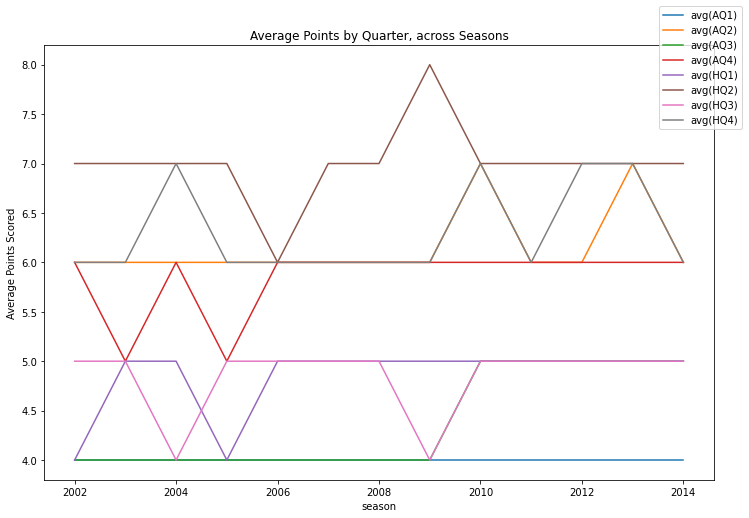

In [74]:
import matplotlib.pyplot as plt 

# creating line chart 
means.plot.line(x = 'season', figsize = (12, 8))
plt.title("Average Points by Quarter, across Seasons") 
plt.legend(bbox_to_anchor = (1.05, 1.1)) 
plt.ylabel("Average Points Scored") 
plt.show() 
plt.close()

Average scores in quarters leading into halftime or the end of a game (Q2, Q4) appear to be consistently higher than other quarters (Q1, Q3). The lowest 4 lines correspond to quarters 1 and 3 for away and home teams. 

Additionally, it appears that home teams tend to score more on average than away teams. 